In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn. model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn. linear_model import LogisticRegression
from sklearn. decomposition import PCA as RandomizedPCA
from sklearn import datasets, linear_model, metrics
from sklearn. metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
carPricing = pd.DataFrame(pd.read_csv('Processed_Data_1.csv'))
carPricing.head()

,Unnamed: 0,x0_ACURA,x0_ASTON MARTIN,x0_AUDI,x0_BENTLEY,x0_BMW,x0_BUICK,x0_CADILLAC,x0_CHEVROLET,x0_CHRYSLER,...,x5_Silver,x5_Sky blue,x5_White,x5_Yellow,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1.155377,0.865499,-0.729308,1.411612,1.331523,25089
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1.893813,-0.305374,-1.123801,-0.420490,1.331523,10192
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,-1.798368,-0.773724,-1.453610,-2.252593,-0.135882,8500
3,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,-1.059931,-0.305374,0.802758,-0.420490,-1.603287,18817
4,4,0,0,0,0,1,0,0,0,0,...,0,0,1,0,-1.429150,0.865499,0.814897,1.411612,0.353253,21012


In [3]:
m = len(carPricing)
m

9640

In [4]:
df = pd.DataFrame(carPricing)
column_names = df.columns.values

In [5]:
X1 = carPricing.iloc[:, 1:-1].values
Y1 = carPricing.iloc[:, -1].values

In [6]:
X1 = carPricing.iloc[:, 1:-1].values
Y1 = carPricing.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test =train_test_split(carPricing, train_size = 0.8, test_size = 0.2)
df_train.shape

(7712, 84)

In [8]:
Y_train = df_train.values[:,0]
X_train = df_train.values[:,1:13]
Y_test = df_test.values[:,0]
X_test = df_test.values[:,1:13]

In [9]:
X_train.shape

(7712, 12)

In [10]:
X_test.shape

(1928, 12)

In [11]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
 
from sklearn.preprocessing import StandardScaler 
sc_X1 = StandardScaler() 
X_train = sc_X1.fit_transform(X_train) 
X_test = sc_X1.transform(X_test)

In [12]:
#Lets create a matrix with single column of ones 
X_01 = np.ones((7712, 1)) 
X_02 = np.ones((1928, 1))

In [13]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1 = X_train.reshape(7712, 12) 
X_N2 = X_test.reshape(1928, 12)

In [14]:
X_train1 = np.hstack((X_01, X_N1)) 
X_test1 = np.hstack((X_02, X_N2))

In [15]:
X_train1.shape

(7712, 13)

In [16]:
theta = np.zeros(13) 
theta
Y_train.shape

(7712,)

In [17]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [18]:
def gradient_descent(X, X2, Y ,Y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, Y, theta)   
        cost_history2[i] = compute_cost(X2, Y2, theta)
    return theta, cost_history, cost_history2

In [19]:
iterations = 8000; 
alpha = 0.1;

In [20]:
theta, cost_history_a, cost_history2_a = gradient_descent(X_train1, X_test1, Y_train, Y_test, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1], cost_history2_a[-1])

Final value of theta = [4803.28643672   67.06183833    0.         -130.98112279   11.56908509
   99.97254778  -84.16240912   26.26433321 -136.14817602 -109.40293439
 -201.37424909  -49.76205795 -165.75607791]
cost_history = 3046530.8130221586 755378.4603354966


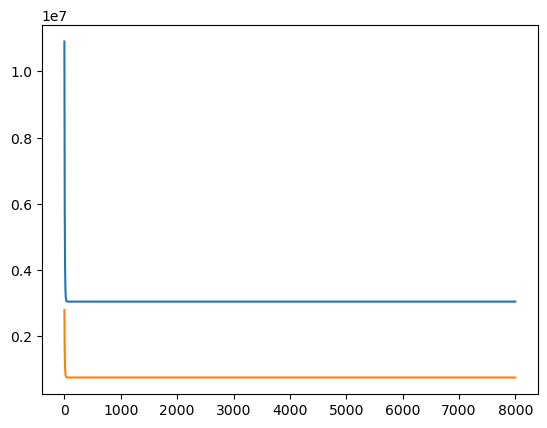

In [21]:
plt.plot(cost_history_a, label = "line 1")
plt.plot(cost_history2_a, label = "line 2")

In [26]:
from sklearn.metrics import mean_squared_error
MSE_lin = []
RMSE_lin = []
for k in range(1, 41):
    pca=PCA(n_components=k)
    principalComponents = pca.fit_transform(X1)
    principalDf = pd.DataFrame(data=principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,
                                                       Y1, test_size=0.2,
                                                       random_state=0)
    y_lin = LinearRegression().fit(X_train, Y_train).predict(X_test)
    MSE_lin.append(mean_squared_error(Y_test, y_lin))
    RMSE_lin.append(np.sqrt(mean_squared_error(Y_test, y_lin)))
    print(k)
    print(MSE_lin[-1])
    print('RMSE: ', RMSE_lin[-1])
    print("-----------------")

1
229020180.8162393
RMSE:  15133.412728668947
-----------------
2
190896699.16794223
RMSE:  13816.537162688132
-----------------
3
174489054.8089978
RMSE:  13209.430525537344
-----------------
4
174450221.1071479
RMSE:  13207.960520350896
-----------------
5
173065347.21349117
RMSE:  13155.430331748603
-----------------
6
172780361.82887617
RMSE:  13144.594395753571
-----------------
7
171387292.524465
RMSE:  13091.496955064573
-----------------
8
168652248.20948923
RMSE:  12986.618043566586
-----------------
9
163767971.17555076
RMSE:  12797.186064739028
-----------------
10
161187632.35976407
RMSE:  12695.969138264478
-----------------
11
158680466.1173867
RMSE:  12596.843498169956
-----------------
12
158232254.47117627
RMSE:  12579.040284186081
-----------------
13
158071934.5791876
RMSE:  12572.666168286964
-----------------
14
156621818.26428905
RMSE:  12514.863893158768
-----------------
15
156308188.6319892
RMSE:  12502.327328621228
-----------------
16
156276464.58471948
RMSE:

(40,)


Text(0.5, 1.0, 'Root-Mean-Squared-Error (RMSE) vs No. PCA Components')

<Figure size 640x480 with 0 Axes>

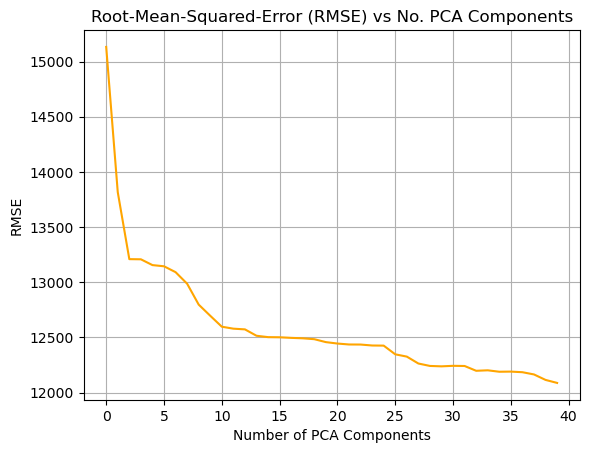

In [27]:
plt.figure(1)
fig = plt.figure(dpi=100)
print(np.array(MSE_lin).shape)
plt.plot(RMSE_lin, color='orange', label='Linear Regression')
plt.grid(mean_squared_error(Y_test, y_lin))
plt.xlabel('Number of PCA Components')
plt.ylabel('RMSE')
plt.title("Root-Mean-Squared-Error (RMSE) vs No. PCA Components")